In [1]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.9 MB 4.8 MB/s 
     |████████████████████████████████| 179 kB 52.8 MB/s 
     |████████████████████████████████| 73 kB 2.5 MB/s 
     |████████████████████████████████| 45 kB 3.4 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.4 which is incompatible.


In [2]:
import pandas as pd 

In [17]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/nifty50-prophet.csv",  parse_dates=['ds'])
df.head()

,ds,y
0,2000-01-03,1592.2
1,2000-01-04,1638.7
2,2000-01-05,1595.8
3,2000-01-06,1617.6
4,2000-01-07,1613.3


In [18]:
last = df[len(df)-1100:]
last

,ds,y
4499,2018-01-22,10966.20
4500,2018-01-23,11083.70
4501,2018-01-24,11086.00
4502,2018-01-25,11069.65
4503,2018-01-29,11130.40
...,...,...
5594,2022-06-27,15832.05
5595,2022-06-28,15850.20
5596,2022-06-29,15799.10
5597,2022-06-30,15780.25


In [7]:
#df = df[:-1100]
#df['ds']

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
3394   2013-08-01
3395   2013-08-02
3396   2013-08-05
3397   2013-08-06
3398   2013-08-07
Name: ds, Length: 3399, dtype: datetime64[ns]

In [27]:
from prophet import Prophet
fbp = Prophet(daily_seasonality=True)
fbp.fit(df)
future = fbp.make_future_dataframe(periods=248*10)

14:02:33 - cmdstanpy - INFO - Chain [1] start processing
14:02:38 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
forecast = fbp.predict(future)

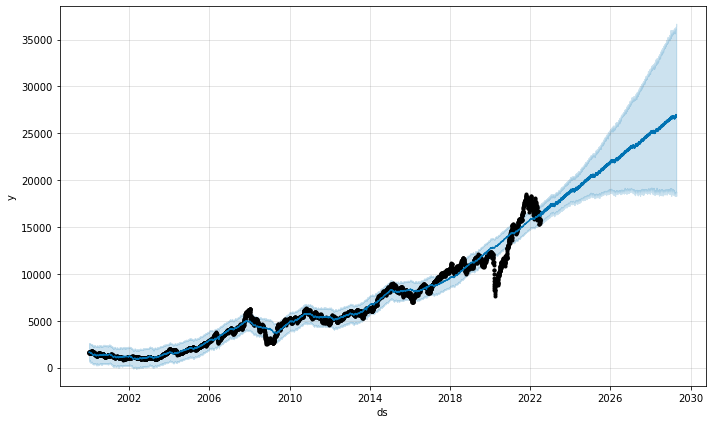

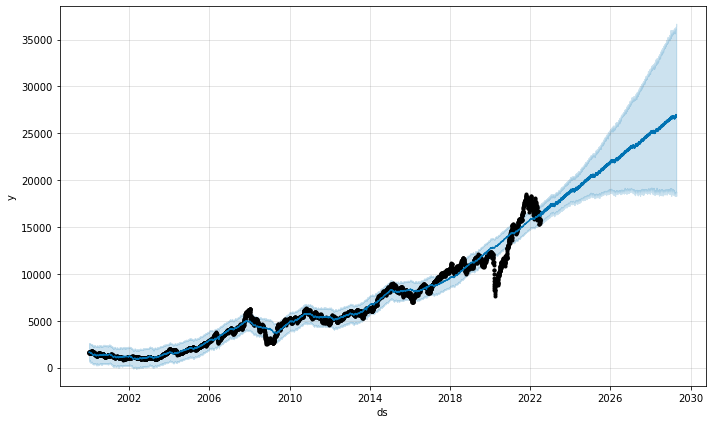

In [29]:
fbp.plot(forecast)

In [31]:
forecast [forecast.ds == '2025-07-04']['yhat']

6696    21050.984558
Name: yhat, dtype: float64

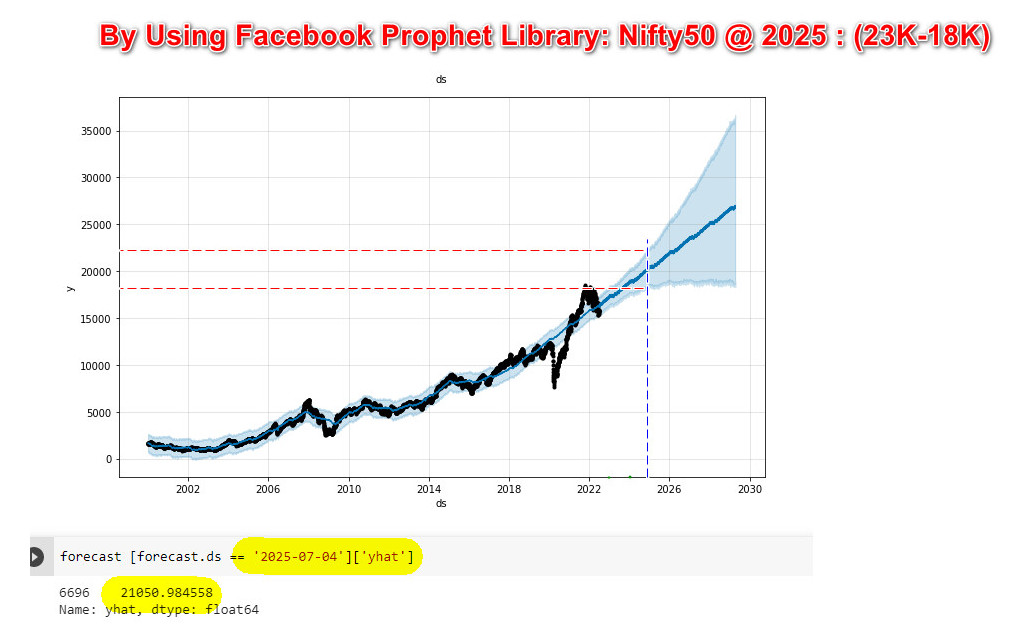